# Loan Prediction Practice ProblemThe Data by Erez & Yakir


![](ada.PNG)

# The Data

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)


# Setup

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


now we will import libraries we will use later, in the prediction process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

After importing the library, we read the dataset using function read_csv().

In [3]:
df = pd.read_csv("./data/train.csv") #Reading the dataset in a dataframe using Pandas
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


look at summary of numerical fields by using describe() function

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


plot the histogram of ApplicantIncome in order to see the distribution of this field among the population.

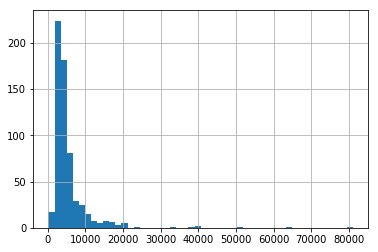

In [5]:
df['ApplicantIncome'].hist(bins=50)

plot the histogram of LoanAmount in order to see the distribution of this field among the population.

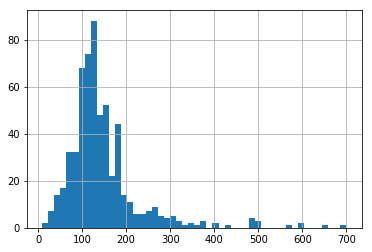

In [6]:
df['LoanAmount'].hist(bins=50)

Frequency Table for Credit History:

In [7]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:

In [8]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789



Probability of getting loan for each Education class:

In [9]:
education_temp = df.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
education_temp

,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940



Probability of getting loan for each Self_Employed class:

In [10]:
self_employed_temp = df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
self_employed_temp


,Loan_Status
Self_Employed,
No,0.686000
Yes,0.682927


see how much N/A is in each field of the df data set.

In [11]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

fill missing values of the Self_Employed field as “No” as there is a high probability of success.

In [12]:
df['Self_Employed'].fillna('No',inplace=True)

In [13]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [14]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [15]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

fill the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History.

In [16]:
df['Loan_Amount_Term'].fillna(360, inplace=True)
df['Credit_History'].fillna(1, inplace=True)
df['Dependents'].fillna(0, inplace=True)
df['Married'].fillna('Yes', inplace=True) 
df['Gender'].fillna('Male', inplace=True) 

In [17]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Building a Predictive Model in Python

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [18]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [20]:
df.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object


Next, we will import the required module. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores. 

In [21]:
#Import models from scikit learn module:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Naive bayes

In [22]:
outcome_var = 'Loan_Status'
model = GaussianNB()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


read the test Data.

In [23]:
df_test = pd.read_csv("./data/test.csv")
df_loan_ids = df_test['Loan_ID']

fill missing id the test data.

In [24]:
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
df_test['Loan_Amount_Term'].fillna(360, inplace=True)
df_test['Credit_History'].fillna(1, inplace=True)
df_test['Married'].fillna('Yes', inplace=True) 
df_test['Gender'].fillna('Male', inplace=True) 
df_test['Dependents'].fillna(0, inplace=True)

In [25]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i].astype(str))

In [26]:
df_test = df_test.drop('Loan_ID' , 1)

check if we fix all

In [27]:
 df_test.apply(lambda x: sum(x.isnull()),axis=0) 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

remove unused fillds

In [28]:
df_test = df_test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']]

predict the Loan_Status according to our model.

In [29]:
result = model.predict(df_test)

map result (0,1) -> ('Y', 'N')

In [30]:
result = ['Y' if l == 1 else 'N' for l in result]

In [31]:
df_to_write = {'Loan_ID' : df_loan_ids , 'Loan_Status' : result}
df_to_write = pd.DataFrame(df_to_write)
df_to_write.to_csv("Submission_NB.csv")

![](nb.PNG)

## AdaBoost

In [32]:
outcome_var = 'Loan_Status'
model = AdaBoostClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 81.109%


read the test Data.

In [33]:
df_test = pd.read_csv("./data/test.csv")
df_loan_ids = df_test['Loan_ID']

fill missing id the test data.

In [34]:
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
df_test['Loan_Amount_Term'].fillna(360, inplace=True)
df_test['Credit_History'].fillna(1, inplace=True)
df_test['Married'].fillna('Yes', inplace=True) 
df_test['Gender'].fillna('Male', inplace=True) 
df_test['Dependents'].fillna(0, inplace=True)

In [35]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i].astype(str))

In [36]:
df_test = df_test.drop('Loan_ID' , 1)

check if we fix all

In [37]:
 df_test.apply(lambda x: sum(x.isnull()),axis=0) 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

remove unused fillds

In [38]:
df_test = df_test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']]

predict the Loan_Status according to our model.

In [39]:
result = model.predict(df_test)

map result (0,1) -> ('Y', 'N')

In [40]:
result = ['Y' if l == 1 else 'N' for l in result]

In [41]:
df_to_write = {'Loan_ID' : df_loan_ids , 'Loan_Status' : result}
df_to_write = pd.DataFrame(df_to_write)
df_to_write.to_csv("Submission_ada.csv")

![](ada.PNG)